**Ejercicio 1:** Realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$. Usar:

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

**Solución:** Creemos primeros la lista que contendrá los valores de $log(h)$.

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [2]:
h_list = [pow(10,-1)]
for i in np.arange(8):
    h_list.append(pow(10,-(2*i + 2)))
    i += 1
h_list

[0.1, 0.01, 0.0001, 1e-06, 1e-08, 1e-10, 1e-12, 1e-14, 1e-16]

In [3]:
h_log = []
for i in np.arange(len(h_list)):
    h_log.append(log(10,h_list[i]))
    i += 1
h_log

[-1.0000000000000002,
 -0.5000000000000001,
 -0.25000000000000006,
 -0.16666666666666669,
 -0.125,
 -0.1,
 -0.08333333333333334,
 -0.07142857142857144,
 -0.0625]

Ahora definamos una función que nos halle las segundas derivadas de una función

In [4]:
def sda(f,x,h):
    """
    Numerical differentiation by finite differences. Uses central point formula
    to approximate first derivative of function.
    Args:
        f (function): function definition.
        x (float): point where first derivative will be approximated
        h (float): step size for central differences. Tipically less than 1
    Returns:
        ddfa (float): approximation to second_derivative.
    """
    ddfa = (f(x + 2*h) - 2*f(x + h) + f(x))/(pow(h,2))
    
    return ddfa

Escribamos ahora la función a diferenciar

In [5]:
f = lambda x : exp(-x)
print(f(-1))

2.718281828459045


Obtengamos ahora la lista con el valor de la segunda derivada para cada valor distinto de **_h_**:

In [6]:
d2f = []
for i in range(0,len(h_list)):
    d2f.append(sda(f,1,h_list[i]))
print(d2f)

[0.3331485687485369, 0.3642220147398456, 0.3678426563347159, 0.36781688805831436, -0.5551115123125782, 0.0, 111022302.46251567, -555111512312.5782, -1.1102230246251566e+16]


A pesar de que la derivada es positiva definida, obtenemos valores negativos, procigamos aún así creando la función para obtener los errores relativos.

In [7]:
def rae(aprox, obj):
    if(np.abs(obj) > 0 ):
        return np.abs(aprox-obj)/np.abs(obj)
    else:
        return np.abs(aprox-obj)

In [8]:
obj = f(-1)
err1 = []
for i in range(0,len(h_list)):
    err1.append(rae(d2f[i],obj))
err1

[0.8774414907017225,
 0.8660102087551688,
 0.8646782491485658,
 0.8646877287676884,
 1.2042141129373856,
 1.0,
 40842821.58747711,
 204214112938.3855,
 4084282258747711.5]

Ahora, se creará la lista y sus entradas con el *log(**Err_Abs**)*:

In [9]:
err2 = []
for i in range(0,len(h_list)):
    if(err1[i] == 1.0):
        err2.append(0)
    else: 
        err2.append(log(10,err1[i]))
err2

[-17.61126649511319,
 -16.005893145678137,
 -15.836449887431648,
 -15.837644058908293,
 12.391003671642094,
 0,
 0.13138678145477348,
 0.08841665942290515,
 0.06405692047566501]

Se observa que se tuvo que *parchar* un error puesto que Python aproxima por algo equivalente a la función de Taylor de **_log(x)_**.
Grafiquemos ahora log(error relativo) vs log(h):

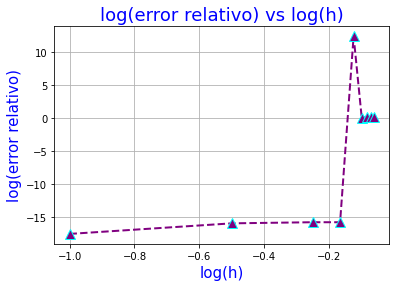

In [43]:

plt.plot(h_log,err2, c = "purple" , ls = '--' , marker = '^' , linewidth=2.0 , markersize = 10.0 , markeredgecolor='cyan')
plt.title("log(error relativo) vs log(h)" , fontsize = 18 , color = "blue")
plt.xlabel("log(h)" , fontsize = 15 , color = "blue")
plt.ylabel("log(error relativo)" , fontsize = 15 , color = "blue")
plt.grid(True)
plt.show()

Para las ideas de diseño me inspiré en trabajos previos que he hecho en un repositorio propio: 
[Repositorio](https://github.com/TheHornyDaddy/48q6a5nevexwrUFv/blob/master/Python_para_Data_Science_con_Ejercicios_Reales/Seccion%204/Matrices.ipynb)

Notemos que los puntos se acumulan en la parte derecha para ver esto podría hacerse un gráfico _KDE_ con el módulo **_seaborn_**.

In [41]:
plt.savefig('log(error_relativo)_vs_log(h).png')

<Figure size 432x288 with 0 Axes>